In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wild-blueberry-yield-prediction-dataset/WildBlueberryPollinationSimulationData.csv
/kaggle/input/playground-series-s3e14/sample_submission.csv
/kaggle/input/playground-series-s3e14/train.csv
/kaggle/input/playground-series-s3e14/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
original_df = pd.read_csv('/kaggle/input/wild-blueberry-yield-prediction-dataset/WildBlueberryPollinationSimulationData.csv').drop(columns='Row#')
original_df

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv').drop(columns='id')
df.sample(4)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
3328,25.0,0.50,0.38,0.50,0.5,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.448841,0.411272,33.289052,4936.10558
6321,25.0,0.50,0.25,0.75,0.5,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.521950,0.455614,36.678777,6397.35569
10340,12.5,0.25,0.38,0.50,0.5,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.458582,0.408445,32.789376,5828.73212
14066,25.0,0.50,0.25,0.63,0.5,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.315500,0.377915,27.735098,3049.26032


In [5]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv')
df_test.sample(4)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
10117,25406,25.0,0.25,0.25,0.38,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.390064,0.401670,30.662187
611,15900,25.0,0.50,0.25,0.50,0.50,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.492546,0.424902,33.311790
7963,23252,25.0,0.50,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.512308,0.459421,37.747509
3725,19014,25.0,0.50,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.532557,0.469966,40.474324


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

In [7]:
df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


clonesize [25.  12.5 37.5 20.  10.  40. ] [25.  12.5 37.5 20.  10. ]


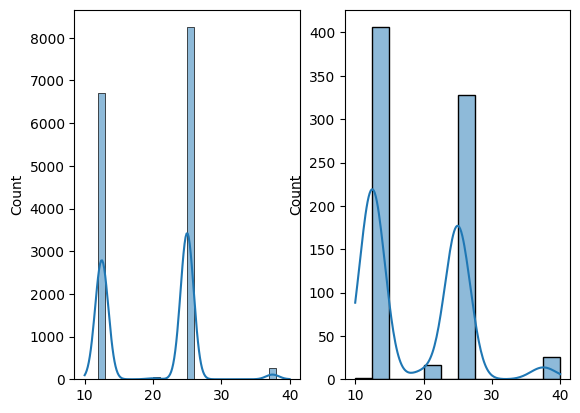

honeybee [ 0.5    0.25   0.75   0.537  0.    18.43   6.64 ] [ 0.25   0.5    0.75   0.     0.537 18.43   6.64 ]


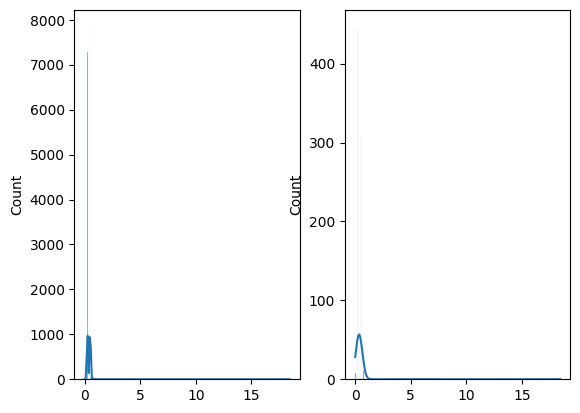

bumbles [0.25  0.38  0.117 0.058 0.56  0.065 0.    0.585 0.042 0.293 0.26 ] [0.25  0.38  0.058 0.    0.117 0.065 0.585 0.042]


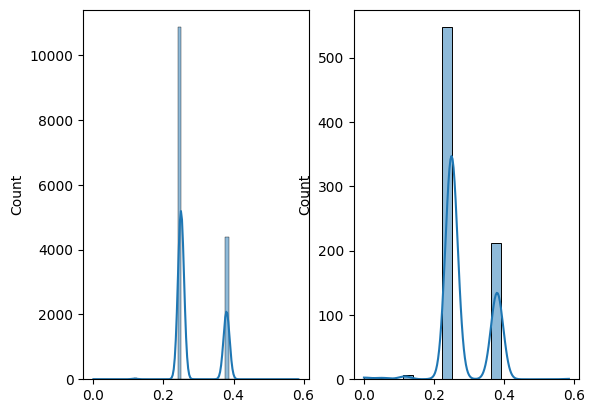

andrena [0.75  0.5   0.63  0.38  0.25  0.409 0.707 0.    0.24  0.56  0.101 0.49
 0.234 0.147 0.235 0.229] [0.25  0.75  0.63  0.38  0.5   0.409 0.    0.229 0.26  0.147 0.585 0.56 ]


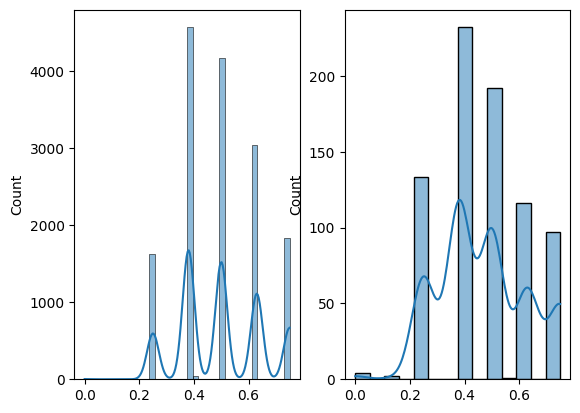

osmia [0.5   0.63  0.75  0.25  0.38  0.058 0.117 0.62  0.585 0.    0.021 0.02
 0.078 0.606] [0.25  0.63  0.75  0.5   0.38  0.117 0.585 0.058 0.033 0.06  0.53  0.
 0.021 0.101]


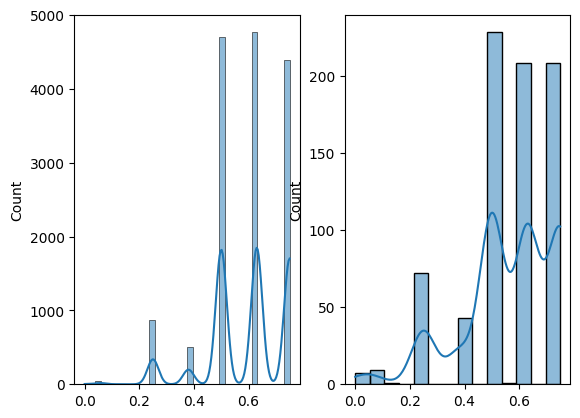

MaxOfUpperTRange [69.7 86.  77.4 94.6 89.  79. ] [86.  94.6 77.4 69.7 79.  89.  71.9]


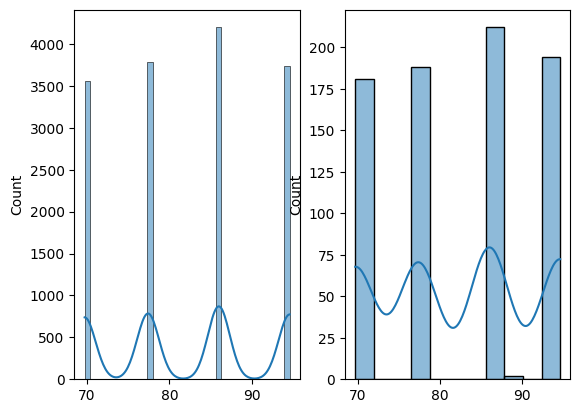

MinOfUpperTRange [42.1 52.  46.8 57.2 39. ] [52.  57.2 46.8 42.1 39.  55.8]


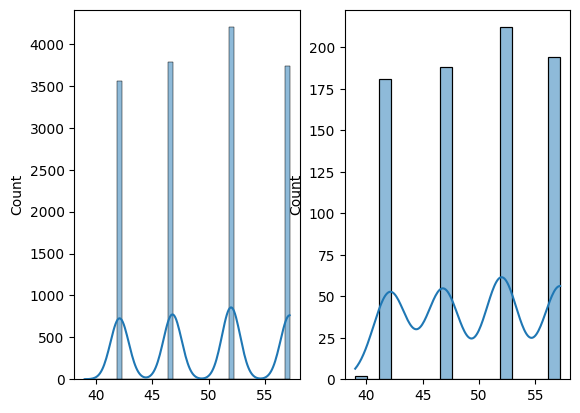

AverageOfUpperTRange [58.2 71.9 64.7 79.  65.6] [71.9 79.  64.7 58.2 65.6 74.6]


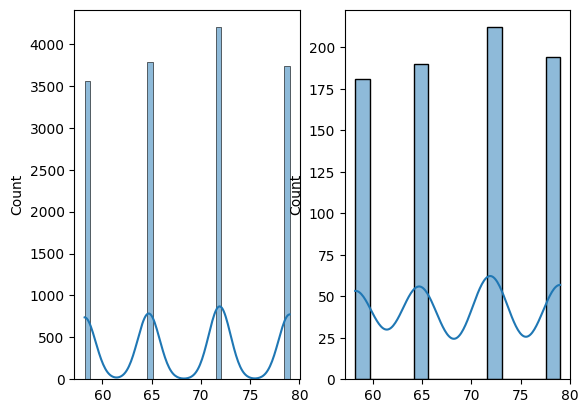

MaxOfLowerTRange [50.2 62.  55.8 68.2 66.  52. ] [62.  68.2 55.8 50.2 66. ]


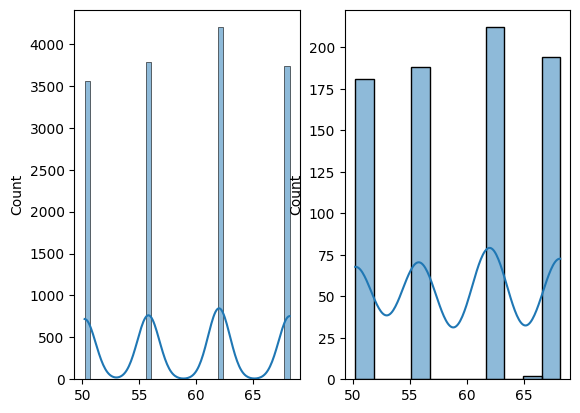

MinOfLowerTRange [24.3 30.  27.  33.  28.  25.  31. ] [30.  33.  27.  24.3 28. ]


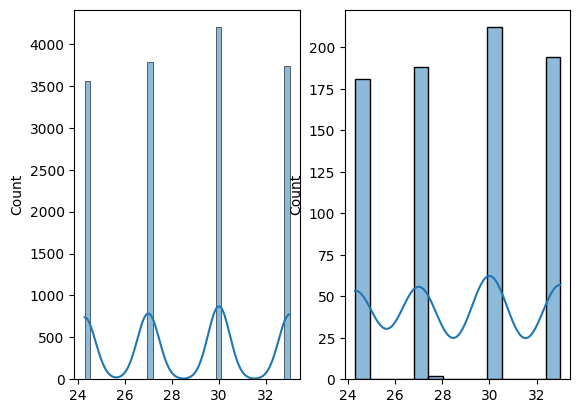

AverageOfLowerTRange [41.2 50.8 45.8 55.9 45.3] [50.8 55.9 45.8 41.2 45.3]


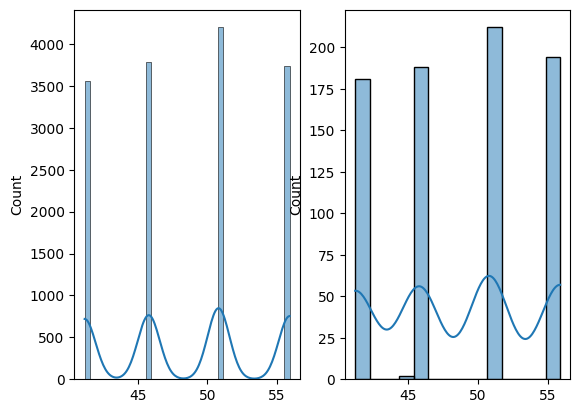

RainingDays [24.   34.    1.   16.    3.77 26.  ] [24.    1.   16.   34.    3.77 33.  ]


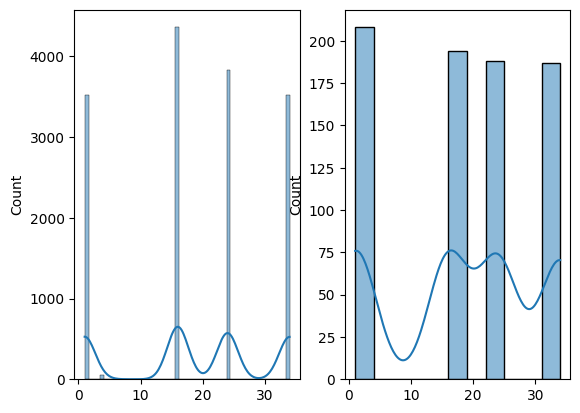

AverageRainingDays [0.39 0.56 0.1  0.26 0.06 0.25 0.07 0.14] [0.39 0.1  0.26 0.56 0.06]


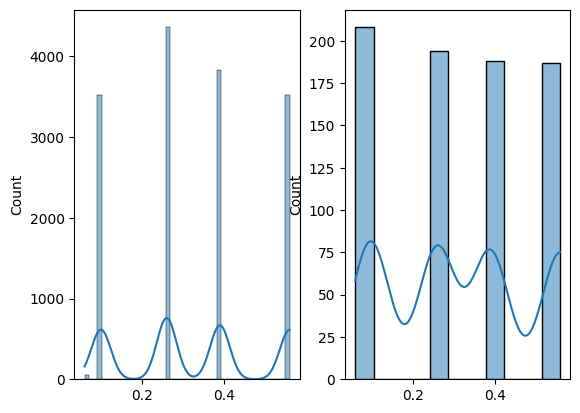

In [8]:
for col in df.columns[df.nunique() < 20]:
    fig, axis = plt.subplots(ncols=2)
    sns.histplot(torch.tensor(df[col]), kde=True, ax=axis[0])
    sns.histplot(torch.tensor(original_df[col]), kde=True, ax=axis[1], legend='original')
    print(col, df[col].unique(), df_test[col].unique())
    plt.show()

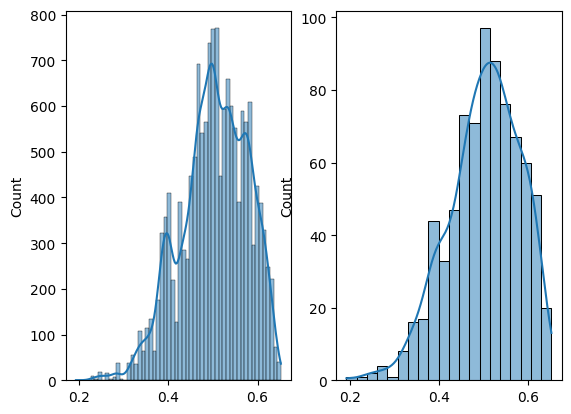

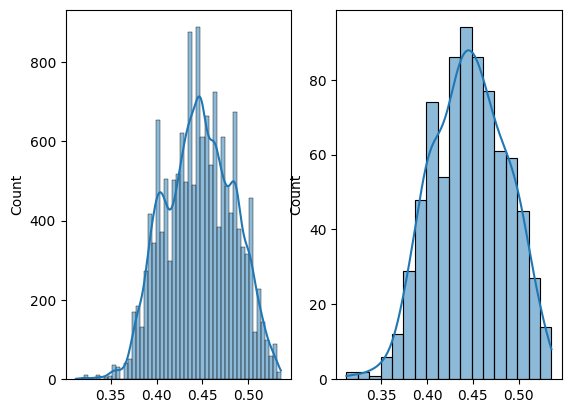

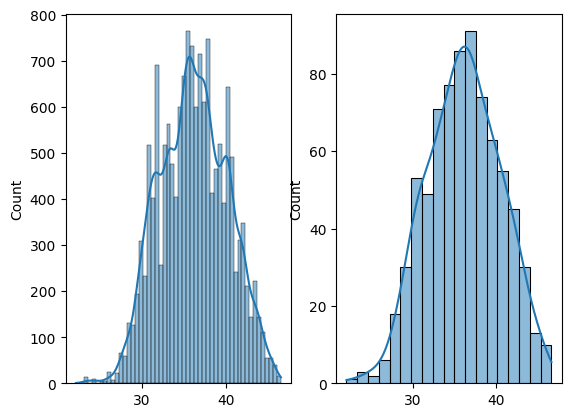

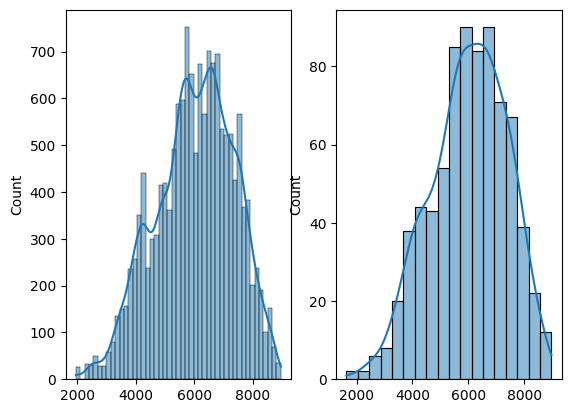

In [9]:
for col in df.columns[df.nunique() > 20]:
    fig, axis = plt.subplots(ncols=2)
    sns.histplot(torch.tensor(df[col]), kde=True, ax=axis[0])
    sns.histplot(torch.tensor(original_df[col]), kde=True, ax=axis[1])
    plt.show()

<AxesSubplot: >

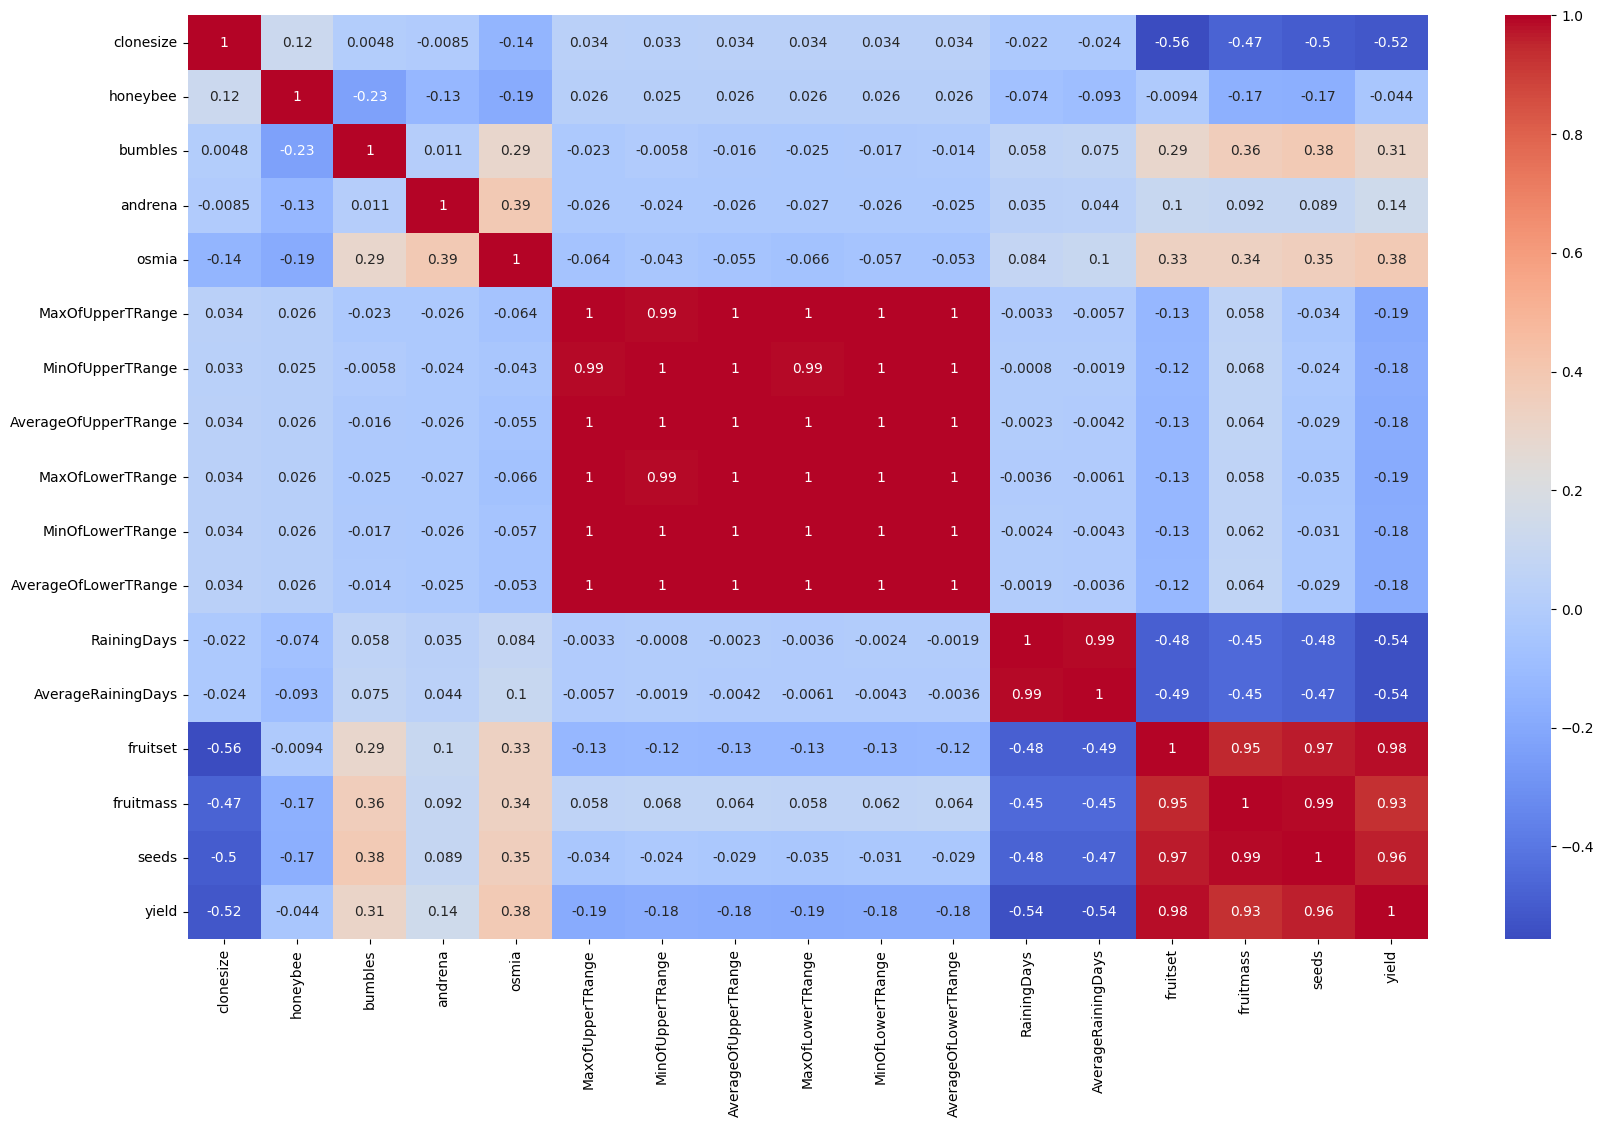

In [10]:
plt.figure(figsize=(20, 12))
sns.heatmap(original_df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot: >

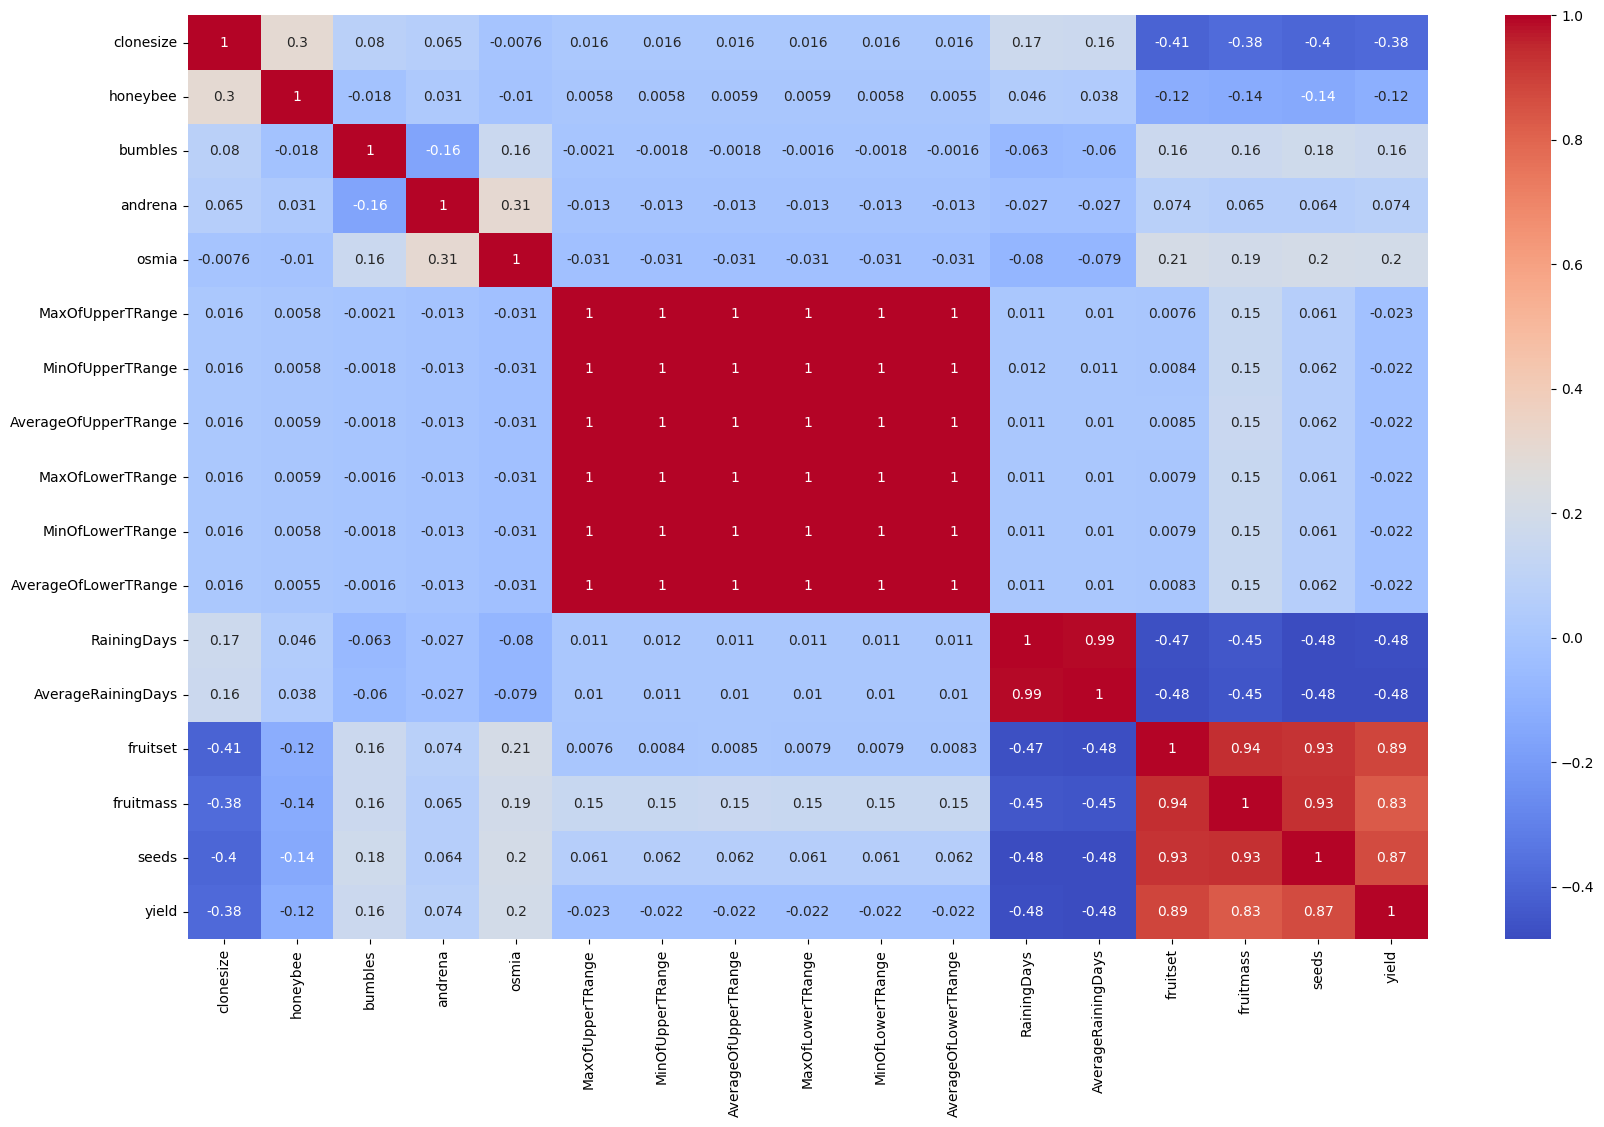

In [11]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [12]:
df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [13]:
original_df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [14]:
new_df = pd.concat([df, original_df], axis=0)

In [15]:
from sklearn.model_selection import train_test_split

# columns_to_consider = ['clonesize', 'honeybee', 'bumbles', 'osmia', 'AverageOfUpperTRange', 'AverageRainingDays', 'fruitset']
# category_columns = ['clonesize', 'honeybee', 'bumbles', 'osmia', 'AverageOfUpperTRange', 'AverageRainingDays']

X = new_df.drop(columns='yield').copy()
# X = X[columns_to_consider]

# for col in category_columns:
#     X[col] = pd.Categorical(X[col])
unique_yields = new_df['yield'].unique()

features_to_remove = ['osmia', 'clonesize', 'MinOfLowerTRange', 'andrena', 'AverageOfLowerTRange', 'AverageOfUpperTRange']
X = X.drop(columns=features_to_remove)
normalize_data = {}
for col in X.columns:
    normalize_data[col] = [X[col].mean(), X[col].std()]
    X[col] = (X[col] - normalize_data[col][0])/normalize_data[col][1]
# X['RANDOM'] = torch.zeros(len(X)).normal_().detach()
    
y = new_df['yield'].copy()


X_train, X_test, y_train, y_test = train_test_split(X, y)
# print(len(X_train), len(X_test), len(y_train), len(y_test))
normalize_data['yield'] = [y_train.mean(), y_train.std()]
y_train = (y_train - normalize_data['yield'][0])/normalize_data['yield'][1]

print(normalize_data)

{'honeybee': [0.39065965392754887, 0.4132589693193066], 'bumbles': [0.2865558944354537, 0.060248564034424974], 'MaxOfUpperTRange': [82.17507157973361, 9.148724707991452], 'MinOfUpperTRange': [49.67459853105938, 5.5486300642993545], 'MaxOfLowerTRange': [59.23339972612972, 6.612253937144634], 'RainingDays': [18.643861571019546, 11.680432751310978], 'AverageRainingDays': [0.32397423129590436, 0.16426598664547784], 'fruitset': [0.502710890858821, 0.07463948169934537], 'fruitmass': [0.44652517629588323, 0.0372003394429055], 'seeds': [36.16289401150206, 4.048406722214392], 'yield': [6019.693826816582, 1332.472867696412]}


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rfr = RandomForestRegressor(n_estimators=200, criterion='absolute_error')
rfr.fit(X_train, y_train)

rfr_eval_preds = rfr.predict(X_test)
rfr_eval_preds = (rfr_eval_preds * normalize_data['yield'][1]) + normalize_data['yield'][0]
score = mean_absolute_error(rfr_eval_preds, y_test)
score

360.8421585125417

In [17]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# scores = []
# for i in range(10, 50):
xgbr = XGBRegressor(n_estimators=14)
xgbr.fit(X_train, y_train)
xgbr_eval_preds = xgbr.predict(X_test)
xgbr_eval_preds = (xgbr_eval_preds * normalize_data['yield'][1]) + normalize_data['yield'][0]
score = mean_absolute_error(xgbr_eval_preds, y_test)
#     scores.append(score)
score

350.10771315560436

<AxesSubplot: >

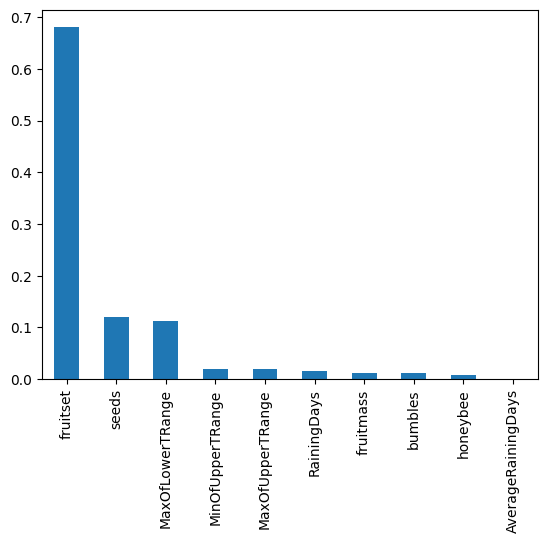

In [18]:
importance = pd.Series(data=xgbr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importance.plot(kind='bar')

In [19]:
# features_to_remove = ['osmia', 'clonesize', 'MinOfLowerTRange', 'andrena', 'AverageOfLowerTRange', 'AverageOfUpperTRange']

In [20]:
# importance.iloc[-9:]

In [21]:
def find_nearest(preds, unique):
    new_preds = []
    for pred in preds:
        prev = -10**5
        for u in unique:
            if abs(pred - u) < abs(pred - prev):
                prev = u
        new_preds.append(prev)
    return new_preds

find_nearest([5, 20], [2, 4, 6, 13, 23])
        

[4, 23]

In [22]:
eval_preds = (xgbr_eval_preds + rfr_eval_preds)/2
eval_preds = find_nearest(eval_preds, unique_yields)
score = mean_absolute_error(eval_preds, y_test)
score

348.6059273691809

In [23]:
sample = pd.read_csv('/kaggle/input/playground-series-s3e14/sample_submission.csv')
sample.head(4)

,id,yield
0,15289,6025.194
1,15290,6025.194
2,15291,6025.194
3,15292,6025.194


In [24]:
submission = sample.copy()

for col in X.columns:
    df_test[col] = (df_test[col] - normalize_data[col][0])/normalize_data[col][1]
df_test = df_test.drop(columns=features_to_remove)

submission['yield'] = (xgbr.predict(df_test.drop(columns='id')) + rfr.predict(df_test.drop(columns='id')))/2
submission['yield'] = (submission['yield'] * normalize_data['yield'][1]) + normalize_data['yield'][0]
submission['yield'] = find_nearest(submission['yield'].tolist(), unique_yields)
submission.to_csv('submission.csv', index=False)

In [25]:
submission

,id,yield
0,15289,4320.874160
1,15290,6058.648760
2,15291,7198.422854
3,15292,4580.393000
4,15293,3822.981667
...,...,...
10189,25478,5482.081299
10190,25479,5548.122010
10191,25480,6400.022210
10192,25481,4433.536970
